# Walmart Assignment

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the dataset from Excel file
file_path = r"C:\Users\samar\Downloads\BA Assignment Walmart Sales.xlsx"
df = pd.read_excel(file_path)

# Display the first few rows to understand its structure
df.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08:00,Ewallet,9.1
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29:00,Cash,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23:00,Credit card,7.4
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33:00,Ewallet,8.4
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37:00,Ewallet,5.3


In [4]:
# Check for null values
null_values = df.isnull().sum()

# Check for duplicate values
duplicate_values = df.duplicated().sum()

print("Null values in each column:")
print(null_values)
print("\nNumber of duplicate rows:")
print(duplicate_values)

Null values in each column:
Invoice ID       0
Branch           0
City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Date             0
Time             0
Payment          0
Rating           0
dtype: int64

Number of duplicate rows:
0


## Part A

In [5]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
# Calculate Total Sales
df['Total'] = df['Unit price'] * df['Quantity']

In [15]:
# Group by City and Branch
city_branch_sales = df.groupby(['City', 'Branch']).agg({'Total': 'sum','Invoice ID': 'count'}).rename(columns={'Total': 'Total Revenue', 'Invoice ID': 'Total Sales'})
city_branch_sales.reset_index(inplace=True)
print(city_branch_sales)

        City Branch  Total Revenue  Total Sales
0   Mandalay      A       34130.09          119
1   Mandalay      B       37215.93          118
2   Mandalay      C       29794.62           95
3  Naypyitaw      A       35985.64          110
4  Naypyitaw      B       35157.75          109
5  Naypyitaw      C       34160.14          109
6     Yangon      A       33647.27          114
7     Yangon      B       35193.51          113
8     Yangon      C       32302.43          113


### *This is the performance of Sales and Revenue at the City and Branch Level*

## Part B

In [8]:
# Calculate Total Sales
df['Total'] = df['Unit price'] * df['Quantity']

In [16]:
# Group by City and Branch
city_branch_sales = df.groupby(['City', 'Branch']).agg({'Total': 'sum','Invoice ID': 'count'}).rename(columns={'Total': 'Total Revenue', 'Invoice ID': 'Total Sales'})
city_branch_sales.reset_index(inplace=True)
city_branch_sales


,City,Branch,Total Revenue,Total Sales
0,Mandalay,A,34130.09,119
1,Mandalay,B,37215.93,118
2,Mandalay,C,29794.62,95
3,Naypyitaw,A,35985.64,110
4,Naypyitaw,B,35157.75,109
5,Naypyitaw,C,34160.14,109
6,Yangon,A,33647.27,114
7,Yangon,B,35193.51,113
8,Yangon,C,32302.43,113


In [17]:
# Calculate the average price of an item sold at each branch of the city
average_price = df.groupby(['City', 'Branch']).agg({'Unit price': 'mean'}).rename(columns={'Unit price': 'Average Unit Price'})
average_price.reset_index(inplace=True)
average_price


,City,Branch,Average Unit Price
0,Mandalay,A,53.353866
1,Mandalay,B,56.133305
2,Mandalay,C,57.958316
3,Naypyitaw,A,54.123182
4,Naypyitaw,B,57.785688
5,Naypyitaw,C,57.941009
6,Yangon,A,55.639298
7,Yangon,B,56.011062
8,Yangon,C,52.684602


### *This is the Average Price of an item sold at each Branch of the City*

## Part C

In [11]:
# Filter data for April 2019
april_data = df[(df['Date'].dt.year == 2019) & (df['Date'].dt.month == 4)]


In [12]:
df. head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating,Total
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,2019-01-05,13:08:00,Ewallet,9.1,522.83
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,2019-03-08,10:29:00,Cash,9.6,76.40
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,2019-03-03,13:23:00,Credit card,7.4,324.31
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,2019-01-27,20:33:00,Ewallet,8.4,465.76
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2019-02-08,10:37:00,Ewallet,5.3,604.17


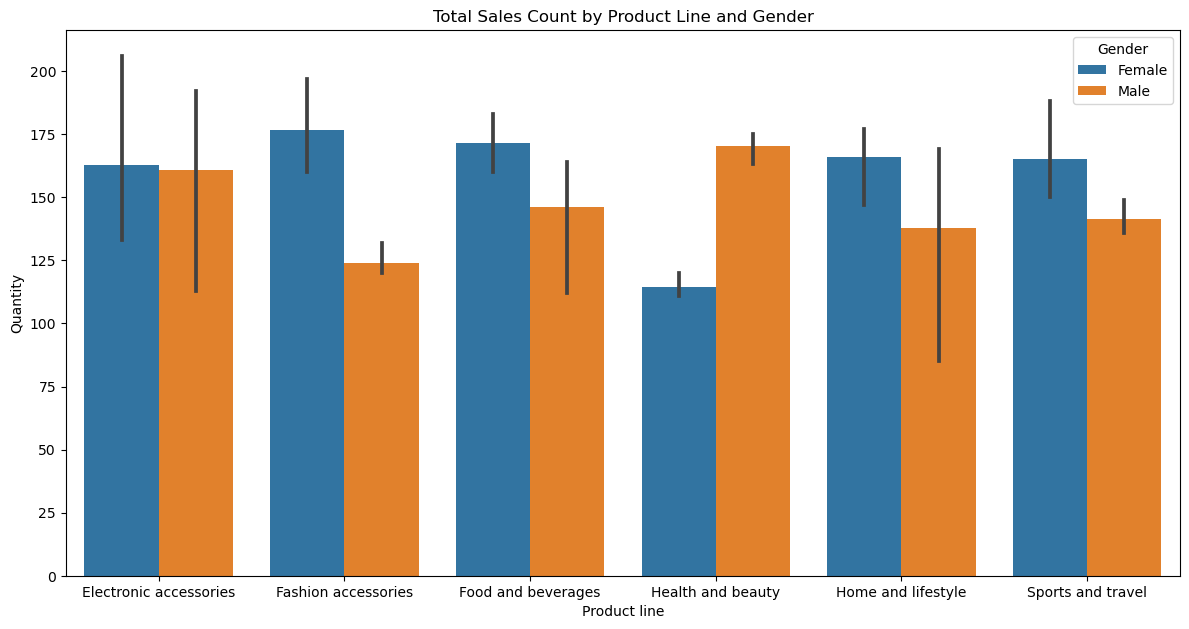

In [19]:
# Filter data for the available period (up to March 2019)
available_data = df[df['Date'] <= '2019-03-30']

# Group by 'Product line', 'Gender', and 'Payment' and aggregate sales and revenue
grouped_data = available_data.groupby(['Product line', 'Gender', 'Payment']).agg({'Quantity': 'sum','Unit price': 'mean'}).reset_index()

# Drop rows with NaN values in Quantity or Unit price
grouped_data = grouped_data.dropna(subset=['Quantity', 'Unit price'])

# Plotting
plt.figure(figsize=(12, 12))

# Plot for Total Sales (assuming Quantity as sales count)
plt.subplot(2, 1, 1)
sns.barplot(x='Product line', y='Quantity', hue='Gender', data=grouped_data)
plt.title('Total Sales Count by Product Line and Gender')
plt.tight_layout()
plt.show()


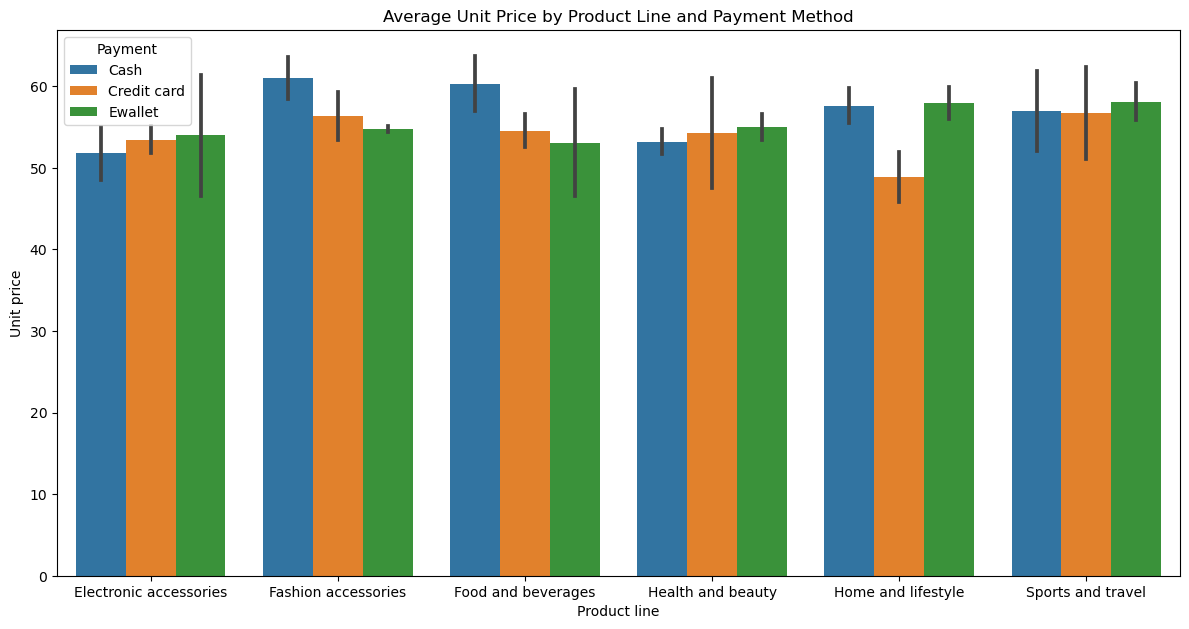

In [21]:
# Plot for Average Unit Price (assuming Unit price as average price per unit sold)
plt.figure(figsize=(12, 12))
plt.subplot(2, 1, 2)
sns.barplot(x='Product line', y='Unit price', hue='Payment', data=grouped_data)
plt.title('Average Unit Price by Product Line and Payment Method')

plt.tight_layout()
plt.show()

### *Based on the analysis above:*

*Product Line wise*: Focus on promoting and potentially expanding inventory in product lines with high sales counts and/or higher average unit prices. I.e. Fashion accessories & Food / beverages for female. Health and beauty for men ; electronics for both genders

*Gender wise*: Tailor marketing campaigns or product offerings for Fashion / accessories & Food / beverages to better appeal to the male gender demographic because it is one of the areas with the highest Average Unit Price by product line. Similarly for female demographic one can promote sports / travel & healthcare / beauty.